In [1]:
#imports
import scipy.io
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import random

## converting image.mat to numpy

In [2]:
# Load the MATLAB file
mat = scipy.io.loadmat('image_xyt.mat')

In [3]:
image=mat['image_xyt']

In [4]:
image.shape

(200, 256, 256)

### view fews sample frames

In [5]:
#function to display random images
def display_random_images(image: np.array,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(image.shape[-1]), k=n)

    # 5. Setup plot
    plt.figure(figsize=(60, 60))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image = image[:,:,targ_sample]
        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image,cmap='gray')
        plt.axis("off")
        plt.title(f'Frame No:{targ_sample}',fontsize=25)

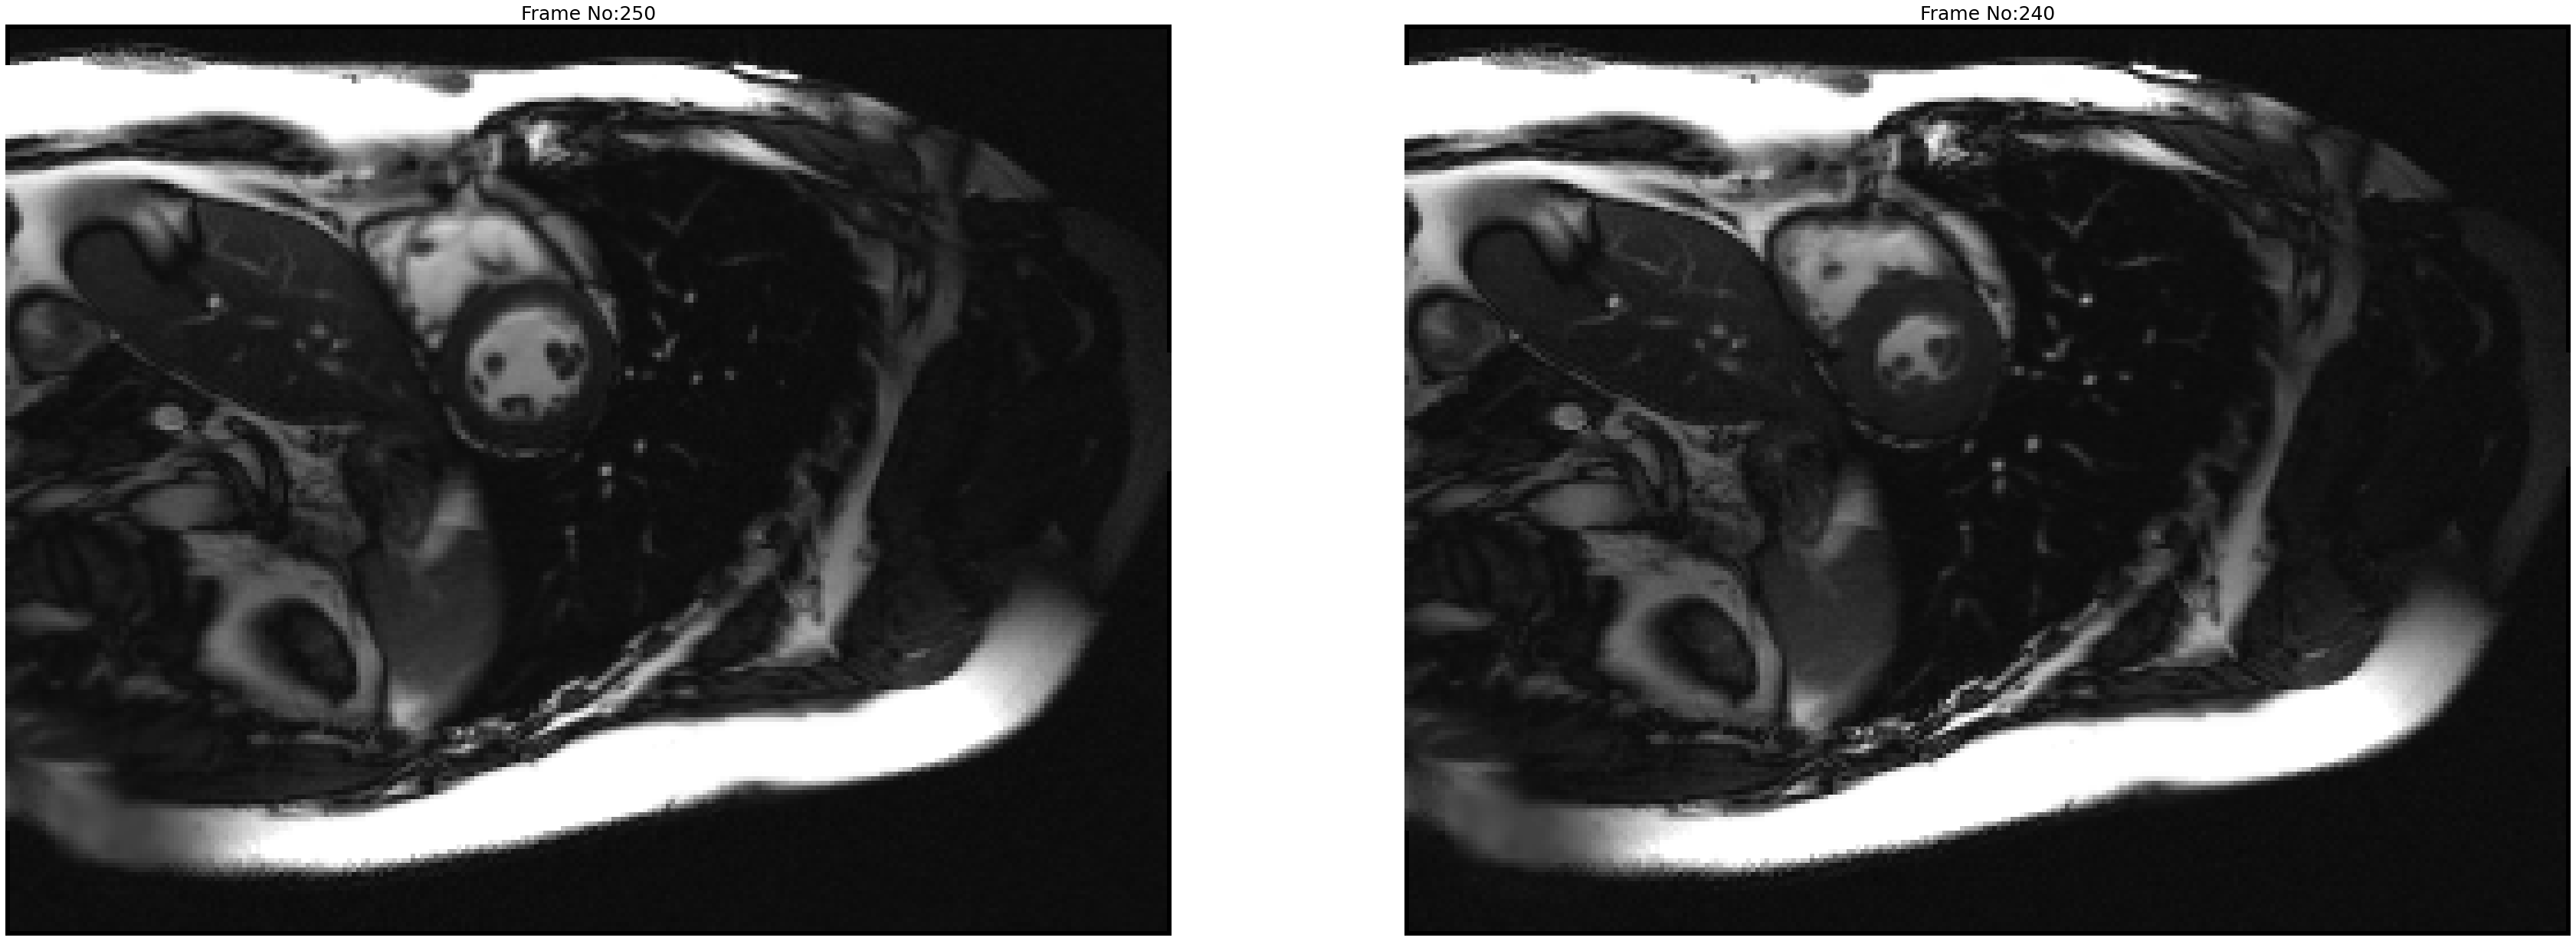

In [6]:
display_random_images(image,n=2)

In [7]:
# defines varibles
#Np: number of phase encodings
Np = image.shape[0]
#number of frequence encodings
Nf = image.shape[1]

#number of frames
Numfr = 2048 # image.shape[2]
Nnav = 4
Ng = 8
Nfr = Numfr/Ng

In [8]:
# convert image to tensor
image_tensor= torch.from_numpy(image)
image_xyt = image_tensor

Kraw = 1/np.sqrt(Np*Nf)*np.fft.fft2(image_xyt)
image_xyt = image_xyt.reshape((int(Np*Nf), int(Nfr)))
Kraw = Kraw.reshape((int(Np*Nf), int(Nfr)))


def temp_sampling_generation(Np, Nfr, Nnav, Nsam):
    temmask = np.zeros((int(Np), int(Nfr)))
    nav_ind = np.arange((Np/2-Nnav/2+1)-1,Np/2+Nnav/2)
        
    for ii in range(1,Np):
        if (ii in nav_ind):
            temmask[ii, :] = np.ones((1, int( Nfr)))
        else:
            temp = np.zeros((1, int(Nfr)))
            ind = np.random.permutation(int(Nfr))
            temp[:,ind[1:Nsam]] = 1
            temmask[ii, :] = temp
    return temmask.astype(bool)


In [9]:
Nsam = 32;
nav_ind =np.arange((Np/2-Nnav/2+1)-1,Np/2+Nnav/2)
    
temmask = temp_sampling_generation(Np, Nfr, Nnav, Nsam);
print(temmask.shape)
print(nav_ind)

(200, 256)
[ 98.  99. 100. 101.]


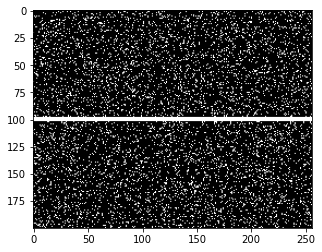

In [10]:
plt.imshow(temmask,cmap='gray')

In [11]:
Nsam = 32;
nav_ind = np.arange((Np/2-Nnav/2+1)-1,Np/2+Nnav/2);
    
temmask = temp_sampling_generation(Np, Nfr, Nnav, Nsam);
temmask = np.fft.fftshift(temmask, axes=0);


# replicate the temmask array Nf times along the columns
temmask_repeated = np.tile(temmask, (1, Nf))

# reshape to 3D array and permute dimensions
Mask = np.transpose(temmask_repeated.reshape((int(Np), int(Nf), int(Nfr))), (0, 2, 1))

# reshape to 2D array
Mask = Mask.reshape((int( Np*Nf)), int(Nfr))


# d = Kraw[Mask]
d= np.transpose(Kraw,(1,0))[np.transpose(Mask,(1,0))]
print(d.shape)

(1809664,)


In [12]:
Kraw.shape

(51200, 256)

In [13]:
nav_location = np.zeros((Np, 1));
print(nav_ind)
nav_location[nav_ind.astype('int')] = 1;
# print(nav_location)

[ 98.  99. 100. 101.]


In [14]:
nav_location = np.zeros((Np, 1));
nav_location[nav_ind.astype('int')] = 1;
# print(nav_location)
Kraw = Kraw.reshape(( int(Np), int(Nf), int(Nfr)));
k_raw_processed = Kraw[np.fft.fftshift(nav_location.astype('int')).flatten(),axis=0]
print("nav location", np.fft.fftshift(nav_location.astype('int')).flatten().shape)
print(k_raw_processed.shape)
print(nav_location.astype('int').flatten())
# Find the fully sampled data and reshape it into a 2D matrix
Navdata =  np.reshape(Kraw[np.fft.fftshift(nav_location.astype('int')), :, :], ( int(Nnav*Nf), int(Nfr)))
print(Navdata.shape)



# r = 32;
# [~, ~, Vt_r] = svds(Navdata, r);
# Vt_r = Vt_r';



SyntaxError: invalid syntax (3222855490.py, line 5)